<a href="https://colab.research.google.com/github/emiliomrb/DiploDatos/blob/main/MItigando_el_sesgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etica práctica para la ciencia de datos
## Practico 2: Mitigando sesgo de género con fasstext

### 1 Descargas de herramientas

> Indented block



In [ ]:
!pip install responsibly

     |████████████████████████████████| 28.2MB 148kB/s 
     |████████████████████████████████| 12.8MB 37.7MB/s 
     |████████████████████████████████| 24.2MB 1.5MB/s 
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.2.5 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.2.5 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


#### 1.1 Descarga de librerias

In [ ]:
import io
import warnings
warnings.filterwarnings('ignore')

import responsibly

#import fasttext
#import fasttext.util

#from numpy.linalg import norm # normalize regarding a vector (word)

####1.2 Carga de KeyedVectors

In [ ]:
from gensim.models.keyedvectors import KeyedVectors


wordvectors_file_vec = '/content/fasttext-sbwc.100k.vec'
cantidad = 50000
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

## 2.Normalización de los vectores

In [ ]:
# L2 (euclidean) normalized vectors (without a center!)
wordvectors.init_sims(replace=True)

In [ ]:
# En este caso normalizamos en base a la palabra elegida
from numpy.linalg import norm

norm(wordvectors['gato'])

0.99999994

In [ ]:
# asegurémonos que todos los vectores están normalizados

from numpy.testing import assert_almost_equal

length_vectors = norm(wordvectors.vectors, axis=1)

assert_almost_equal(actual=length_vectors,
                    desired=1,
                    decimal=5)

In [ ]:
import numpy as np
def cosine_similarity(vec1, vec2):
    len1 = np.linalg.norm(vec1)
    len2 = np.linalg.norm(vec2)
    dot_product = np.dot(vec1, vec2)
    return dot_product / (len1 * len2)

### 2.1 Graficamos algunas palabras con tSNE

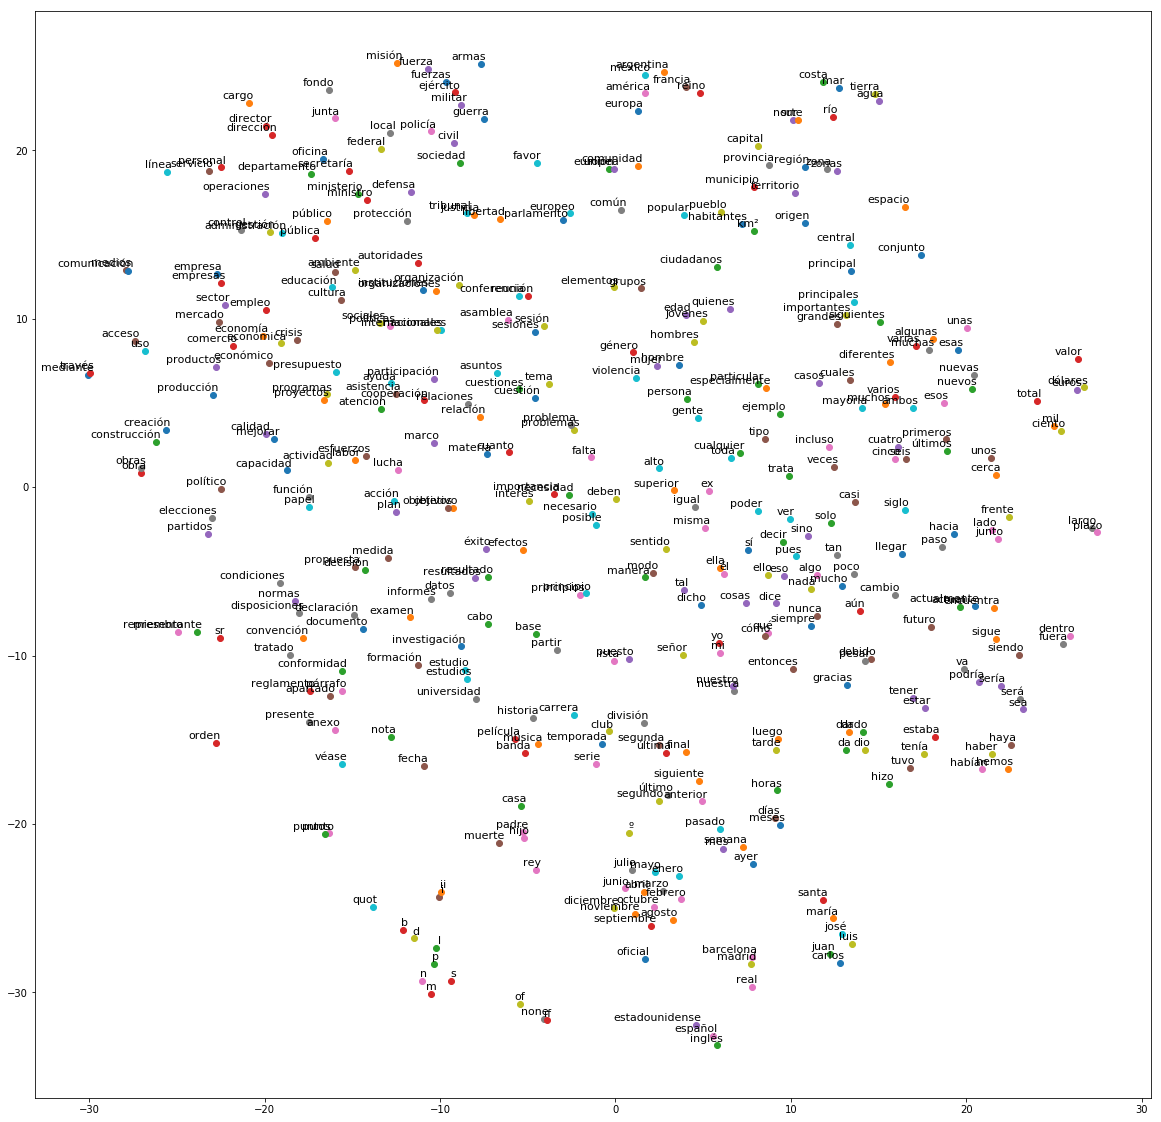

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pylab as plt

# take the most common words in the corpus between 200 and 600
words = [word for word in wordvectors.index2word[200:600]]

# convert the words to vectors
embeddings = [wordvectors[word] for word in words]

# perform T-SNE
words_embedded = TSNE(n_components=2).fit_transform(embeddings)

# ... and visualize!
plt.figure(figsize=(20, 20))
for i, label in enumerate(words):
    x, y = words_embedded[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom', size=11)
plt.show()

##3.Diagnóstico de sesgo de género

In [ ]:
#  mejor como grupo que individual (borrar esto, si parece ok el siguiente Code)
wordvectors.most_similar(positive=['medico', 'hombre'],negative=['él'])
wordvectors.most_similar(positive=['carpintería', 'él'],negative=['ella'])
wordvectors.most_similar(positive=['carpintería', 'ella'],negative=['él'])
wordvectors.most_similar(positive=['carpintero', 'él'],negative=['ella'])
wordvectors.most_similar(positive=['carpintero', 'ella'],negative=['él'])
wordvectors.most_similar(positive=['dirigente', 'hombre'],negative=['mujer'])
wordvectors.most_similar(positive=['dirigente', 'mujer'],negative=['hombre'])


[('coordinadora', 0.5368133187294006),
 ('diputada', 0.5227832794189453),
 ('dirigencia', 0.5187094807624817),
 ('tesorera', 0.5174612998962402),
 ('secretaria', 0.5099250078201294),
 ('dirigentes', 0.4934179186820984),
 ('empresaria', 0.48275065422058105),
 ('presidenta', 0.4817776083946228),
 ('senadora', 0.4739306569099426),
 ('regidora', 0.47373491525650024)]

In [ ]:
# Grouping most similars (Similarides)
df_most_similar={}
df_most_similar['dr_el']= wordvectors.most_similar(positive=['médico', 'hombre'],negative=['él'])
df_most_similar['dr_ella']= wordvectors.most_similar(positive=['médica', 'mujer'],negative=['ella'])
df_most_similar['econ_el']= wordvectors.most_similar(positive=['economista', 'hombre'],negative=['él'])
df_most_similar['econ_ella']= wordvectors.most_similar(positive=['economista', 'mujer'],negative=['ella'])
df_most_similar['carp_el']=wordvectors.most_similar(positive=['carpintería', 'hombre'],negative=['él'])
df_most_similar['carp_el_1']= wordvectors.most_similar(positive=['carpintería', 'él'],negative=['ella'])
df_most_similar['carp_ella']=wordvectors.most_similar(positive=['carpintería', 'ella'],negative=['él'])
df_most_similar['dirigente_el'] = wordvectors.most_similar(positive=['dirigente', 'hombre'],negative=['mujer'])
df_most_similar['dirigente_ella'] = wordvectors.most_similar(positive=['dirigente', 'mujer'],negative=['hombre']) 
df_most_similar

{'carp_el': [('albañilería', 0.5372672080993652),
  ('herrería', 0.5261906385421753),
  ('cantería', 0.49232280254364014),
  ('albañil', 0.4756774306297302),
  ('costura', 0.45878416299819946),
  ('ferretería', 0.4557524621486664),
  ('alfarería', 0.4539721608161926),
  ('panadería', 0.4494883418083191),
  ('madera', 0.4321284890174866),
  ('peluquería', 0.42743682861328125)],
 'carp_el_1': [('albañilería', 0.6682113409042358),
  ('herrería', 0.6483407020568848),
  ('cantería', 0.5699968338012695),
  ('muebles', 0.5180044174194336),
  ('carpintero', 0.5170474052429199),
  ('albañil', 0.5152691602706909),
  ('fundición', 0.5136929750442505),
  ('carpinteros', 0.5130808353424072),
  ('panadería', 0.5129778981208801),
  ('ferretería', 0.5049254298210144)],
 'carp_ella': [('herrería', 0.687015175819397),
  ('albañilería', 0.682686448097229),
  ('cantería', 0.6189953088760376),
  ('costura', 0.5994037389755249),
  ('madera', 0.5699216723442078),
  ('alfarería', 0.5670095682144165),
  ('pelu

### Armamos un listado con profesiones de género neutro

In [ ]:
profesiones_neutras = ['docente',
'estudiante',
'guardia',
'custodia',
'chef',
'militante',
'cantante',
'pianista',
'dentista',
'violinista',
'deportista',
'estadista',
'economista',
'artista',
'vidente',
'agente',
'accionista',
'militar',
'policía',
'espía',
'líder',
'analista',
'asistente',
'auxiliar',
'almirante',
'chofer',
'albañil',
'representante',
'contratista',
'taxista',
'recepcionista',
'terapeuta',
'pediatra',
'psiquiatra',
'periodista',
'testigo',
'víctima',
'atleta',
'cineasta',
'colega',
'corresponsal',
'futbolista',
'astronauta',
'modelo',
'piloto',
'tenista',
'cónsul',
'capataz',
'portavoz',
'guía',
'electricista',
'dirigente'
]

In [ ]:
profesiones_neutras = sorted(profesiones_neutras, key=str.lower)

In [ ]:
print (len(profesiones_neutras))

52


## 4.Identificación del subespacio de género

In [ ]:
# TODO: determiniar la dirección del género a partir de la resta de pares y aplicadno pca/svd. Pregunta: si a las restas de pares
# les aplicamos pca o svd obtendríamos un vector resultante de, por ejemplo, 2 componentes, es correcta esa dimension del vector resultante
# para realizar operaciones??


In [ ]:
# Creamos el centro en base a la dirección deseada
gdirection = wordvectors['mujer'] - wordvectors['hombre']



In [ ]:
# Pipeline for gender direction, normalized (between man and women 1)
gdirection_norm=norm(wordvectors['mujer']-wordvectors['hombre'])
gdirection = (wordvectors['mujer']-wordvectors['hombre']) /gdirection_norm
gdirection # 0.80922437 if not normalized
display(gdirection, gdirection_norm, norm(gdirection))
direction_vector_femine = [
gdirection @ wordvectors['mujer'],
gdirection @ wordvectors['luchadora'],
gdirection @ wordvectors['gata'],
gdirection @ wordvectors['mujer'],
gdirection @ wordvectors['abogada'] ]
direction_vector_masculine = [
gdirection @ wordvectors['hombre'],
gdirection @ wordvectors['luchador'],
gdirection @ wordvectors['gato'],
gdirection @ wordvectors['abogado'] ]
direction_vector_neutral = [
gdirection @ (wordvectors['hombre']+wordvectors['mujer']), # Oficially zero
gdirection @ wordvectors['taxista'],
gdirection @ wordvectors['economista']
]
df={}
df['fem']= direction_vector_femine
df['masc']=direction_vector_masculine
df['neutral']=direction_vector_neutral
df

array([-6.49929047e-03,  8.60778317e-02, -1.59961842e-02,  7.44223297e-02,
        3.72341536e-02, -3.07031907e-02, -5.82999140e-02,  3.85592654e-02,
       -1.53281270e-02, -4.14640009e-02, -2.80690771e-02,  5.70524298e-02,
       -4.26370790e-03, -5.81637993e-02, -4.15577665e-02, -1.46006970e-02,
       -1.49964765e-01, -8.99306461e-02,  3.34307030e-02, -5.60510568e-02,
        8.22423622e-02, -2.75768247e-02, -5.06707318e-02, -5.92598207e-02,
        3.76668833e-02,  8.56105890e-03, -4.61823232e-02,  2.70066522e-02,
        2.74373237e-02,  1.93620082e-02,  3.75842229e-02,  5.00749424e-02,
        2.44262237e-02,  4.13012225e-04, -8.52103680e-02, -4.19029221e-02,
        1.03570096e-01,  3.44276540e-02, -6.40391037e-02,  1.07930735e-01,
        5.16604483e-02, -1.08995646e-01,  3.00044715e-02, -8.05074945e-02,
       -7.81001104e-03,  2.18649451e-02,  4.50142696e-02,  1.31927077e-02,
        2.45913826e-02, -4.63812985e-03,  3.34837101e-02,  8.17714408e-02,
        6.20404780e-02,  

0.899569

1.0

{'fem': [0.44978452, 0.10135627, -0.052882083, 0.44978452, 0.17852865],
 'masc': [-0.4497845, -0.23832461, -0.24687262, -0.08765196],
 'neutral': [1.6298145e-09, -0.1895526, -0.05620551]}

In [ ]:
#normalizamos
gender_direction =gdirection
gender_direction /= norm(gdirection)

In [ ]:
cosine_similarity(wordvectors['dirigente'], wordvectors['mujer'])

0.16438076

In [ ]:
wordvectors['dirigente'] @ wordvectors['mujer']

0.16438074

In [ ]:
wordvectors['dirigente'] @ wordvectors['hombre']

0.31507128

### 4.1 Medición Directa del Sesgo

In [ ]:
#Medicion directa del sesgo


neutral_profession_projections = [wordvectors[word] @ gdirection
                                  for word in profesiones_neutras]

abs_neutral_profession_projections = [abs(proj) for proj in neutral_profession_projections]

sum(abs_neutral_profession_projections) / len(abs_neutral_profession_projections)

0.08678440348460124

### 4.2 Medición indirecta del sesgo

In [ ]:
#Hacer

### 4.3 Obtenemos la similaridad con la dimensión del sesgo y graficamos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#funcion helper
import pandas as pd
def take_two_sides_extreme_sorted(df, n_extreme,
                                  part_column=None,
                                  head_value='',
                                  tail_value=''):
    head_df = df.head(n_extreme)[:]
    tail_df = df.tail(n_extreme)[:]

    if part_column is not None:
        head_df[part_column] = head_value
        tail_df[part_column] = tail_value

    return (pd.concat([head_df, tail_df])
            .drop_duplicates()
            .reset_index(drop=True))


In [ ]:
#Funcion para plotear proyecciones
def plot_projection_scores( words, n_extreme=10,
                               ax=None, axis_projection_step=None):
        """Plot the projection scalar of words on the direction.

        :param list words: The words tor project
        :param int or None n_extreme: The number of extreme words to show
        :return: The ax object of the plot
        """

        #self._is_direction_identified()

        projections_df = pd.DataFrame({'projection':[wordvectors[word] @ gdirection
                                  for word in words],
                                  'word':words})
        projections_df['projection'] = projections_df['projection'].round(2)
        projections_df= projections_df.sort_values(by='projection',ascending=False)

       # if n_extreme is not None:
        #    projections_df = take_two_sides_extreme_sorted(projections_df,
         #                                                  n_extreme=n_extreme)

        if ax is None:
            _, ax = plt.subplots(1)

        if axis_projection_step is None:
            axis_projection_step = 0.1

        cmap = plt.get_cmap('RdBu')
        projections_df['color'] = ((projections_df['projection'] + 0.5)
                                   .apply(cmap))

        most_extream_projection = np.round(
            projections_df['projection']
            .abs()
            .max(),
            decimals=1)

        sns.barplot(x='projection', y='word', data=projections_df,
                    palette=projections_df['color'])

        plt.xticks(np.arange(-most_extream_projection,
                             most_extream_projection + axis_projection_step,
                             axis_projection_step))
        plt.title('← {} {} {} →'.format('él',
                                        ' ' * 20,
                                        'ella'))

        plt.xlabel('Direction Projection')
        plt.ylabel('Words')

        return ax


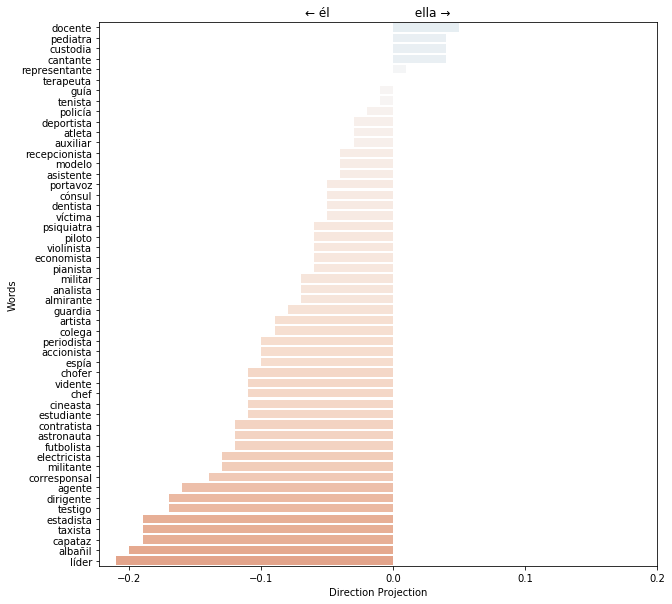

In [ ]:

f, ax = plt.subplots(1, figsize=(10, 10))
plot_projection_scores(profesiones_neutras,n_extreme=52, ax= ax)


## 5.Mitigación del sesgo


###5.1 Neutralizar
After obtaining the bias direction b, we’ll remove the bias components from all gender-neutral words like receptionist and surgeon by subtracting the embedding’s projection onto the bias axis b (using the dot product of e & b). 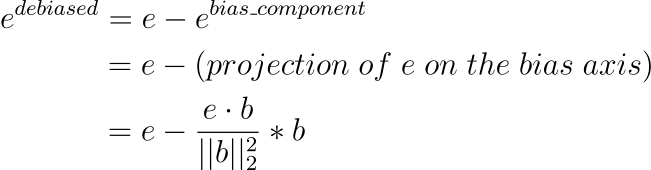


Fuente: https://hackernoon.com/how-to-remove-gender-bias-in-machine-learning-models-nlp-and-word-embeddings-u0533ugl



Proyectar """Projecting the vector v onto direction u."""
(v @ normalize_u) * normalize_u


extraer proyeccion
"""Rejecting the vector v onto direction u."""
   v - project_vector(v, u)

In [ ]:
#Neutralizamos la palabra 'albañil' y obtenemos la similaridad coseno
albañil_debiased = wordvectors['albañil'] - (wordvectors['albañil'] @ gdirection)*gdirection
albañil_debiased @ gdirection

5.9317244e-09

In [ ]:
#Nautralizamos todas los nombres de profesiones neutros y lo guardamos en un dataframe
debiased_projections_df = pd.DataFrame({'projection':[(wordvectors[word] - (wordvectors[word] @ gdirection) * gdirection) @ gdirection
                                  for word in profesiones_neutras],
                                  'word':profesiones_neutras})


Text(0,0.5,'Words')

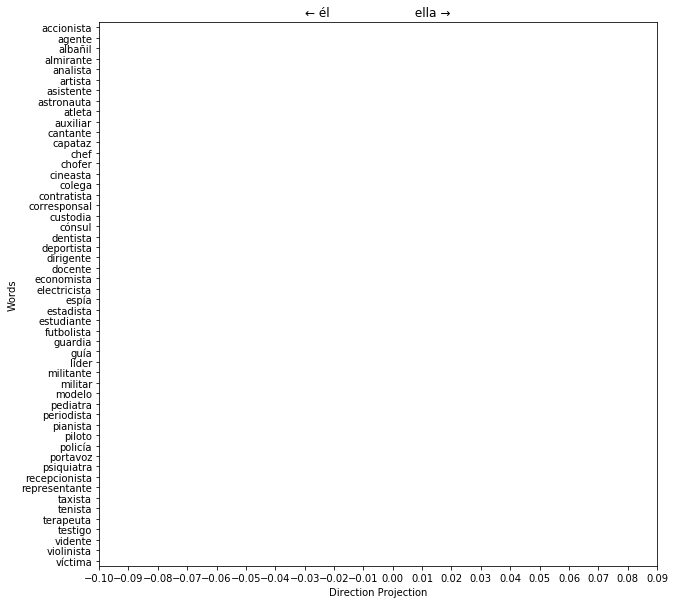

In [ ]:
#Graficamos
f, ax = plt.subplots(1, figsize=(10, 10))

sns.barplot(x='projection', y='word', data=debiased_projections_df)

plt.xticks(np.arange(-0.1, 0.1, step=0.01))

plt.title('← {} {} {} →'.format('él',
                                ' ' * 20,
                                'ella'))

plt.xlabel('Direction Projection')
plt.ylabel('Words')


### 5.2 Ecualizar

For the final step, we take care of the gender-specific words. Words like boy and girl should differ by gender equally i.e. the word ‘boy’ should not be any more masculine as the word ‘girl’ is feminine.

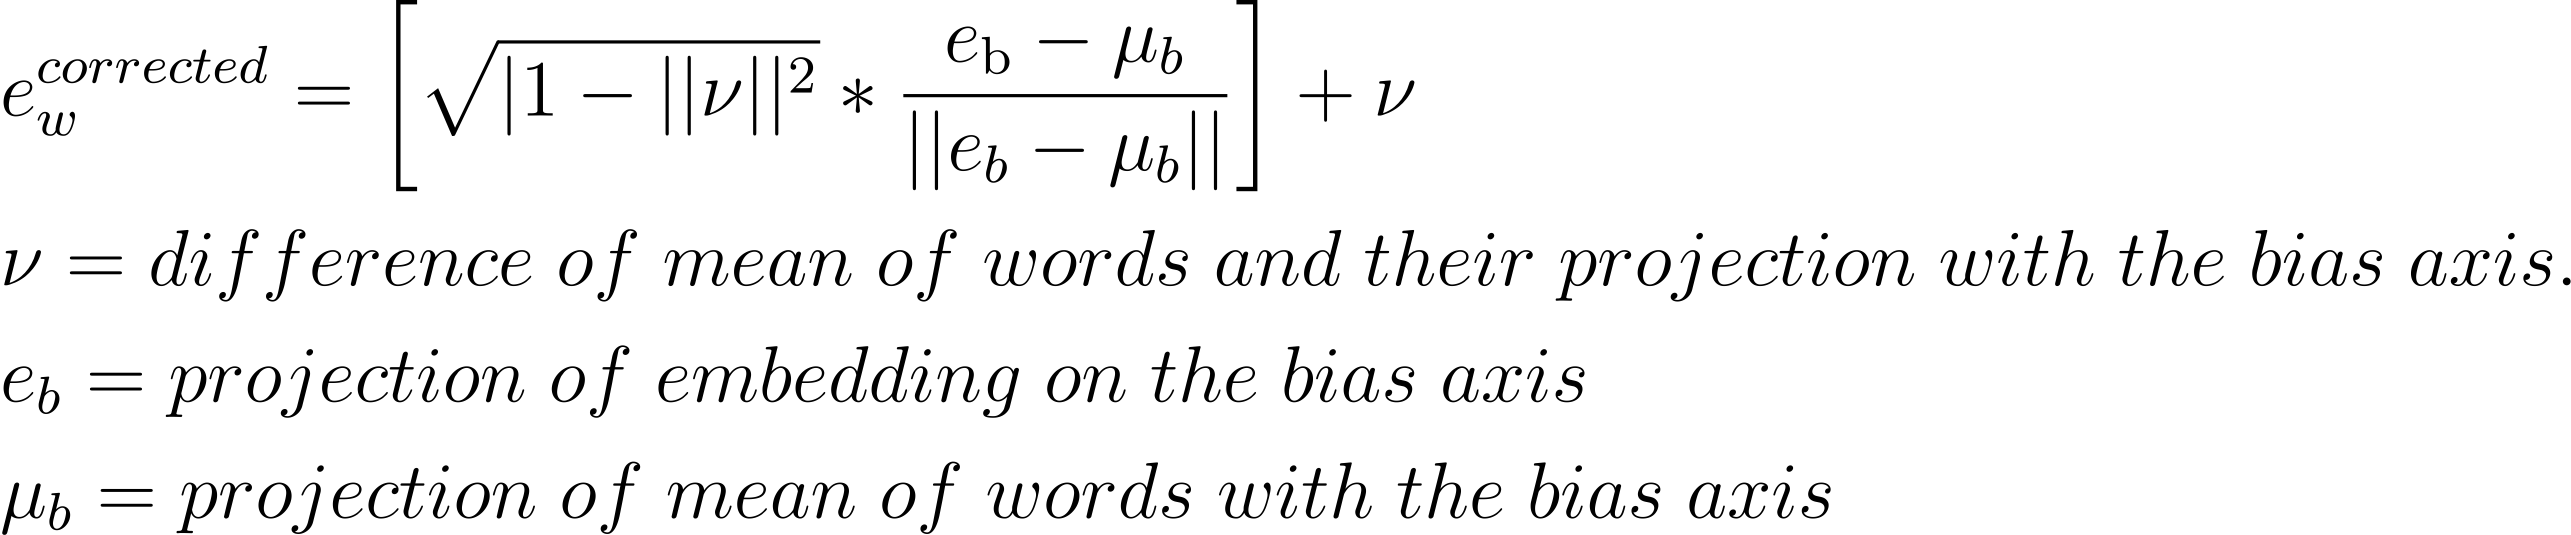




Equalizing Gender-Specific Words [1]
Intuition — For every gender-specific word, we equalize their vector lengths, such that, the gender component is preserved with equal strength in all pairs of words. Furthermore, it enforces that all gender-neutral words are equidistant from gender-specific words. E.g. receptionist is equidistant from boy and girl.






After equalizing, the gender component is equal in gender-specific words
Through all these steps, we can remove the gender-bias in word embeddings, while preserving their useful properties. Some people argue that such word embeddings since trained on large word corpora, capture the statistical reality rather than bias and are acceptable, e.g. more number of computer programmers are males, so it is okay to say that word ‘programmer’ is closer to males than females.